# 📊 Statistical Insights from E-Commerce Transactions

In a previous notebook, we explored the UK-based Online Retail dataset (2010–2011) through basic exploratory data analysis. We identified top customers, high-performing products, sales trends over time, and overall revenue distribution. These findings helped us understand what was happening in the business at a high level.

In this notebook, we shift from exploration to statistical analysis. The goal is to go a step further and ask: *Are these patterns statistically significant?* We'll apply key statistical tools such as hypothesis testing, bootstrapping, t-tests, ANOVA, and non-parametric alternatives to answer practical business questions.

Rather than trying to cover everything, we’ll focus on a few well-defined questions. Each will be framed with a clear hypothesis and backed by statistical evidence.

Let's get started.


In [ ]:
# Get the cleaned data from github repo
import pandas as pd
import seaborn as sns
import numpy as np
url = 'https://raw.githubusercontent.com/williamervin7/Sales-Insights-from-Online-Retail-Data/main/data/cleaned_data.csv.gz'

df = pd.read_csv(url, compression='gzip', parse_dates=['InvoiceDate'])

df = df.rename(columns={'TotalPrice': 'Revenue'})
df.head()


,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue
0,2010-01-12 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,2010-01-12 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,2010-01-12 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,2010-01-12 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,2010-01-12 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


#  Should marketing be weighted toward weekends?
## 🎯 Research Question
Is there a significant difference in average spending per transaction between weekends and weekdays?

Hypotheses
Null Hypothesis (H₀):
There is no difference in average spending per transaction between weekends and weekdays.

Alternative Hypothesis (H₁):
There is a significant difference in average spending per transaction between weekends and weekdays.


First we need to create a new col for weekend and weekday. To do this we will use `dt.weekday` then
create a dictionary to map out the values to either Weekday or Weekend

In [ ]:

df['Weektype'] = df['InvoiceDate'].dt.weekday
week_dic = {0:'Weekday',1:'Weekday',2:'Weekday',3:'Weekday',4:'Weekday',
            5:'Weekend',6:'Weekend'}
df['Weektype'] = df['Weektype'].map(week_dic)
df.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue,Weektype
0,2010-01-12 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,Weekday
1,2010-01-12 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,Weekday
2,2010-01-12 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,Weekday
3,2010-01-12 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,Weekday
4,2010-01-12 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,Weekday


### Revenue Distribution: Weekday vs Weekend

The following histograms show the distribution of total transaction prices on weekdays compared to weekends. Visualizing these distributions helps us understand spending behavior differences between the two periods.  

We plot the raw `Revenue` values to observe the overall spread and frequency of transaction amounts separately for weekdays and weekends.

In order to see the distrabutions we will need to visualize the data. We will use a historgram for
this

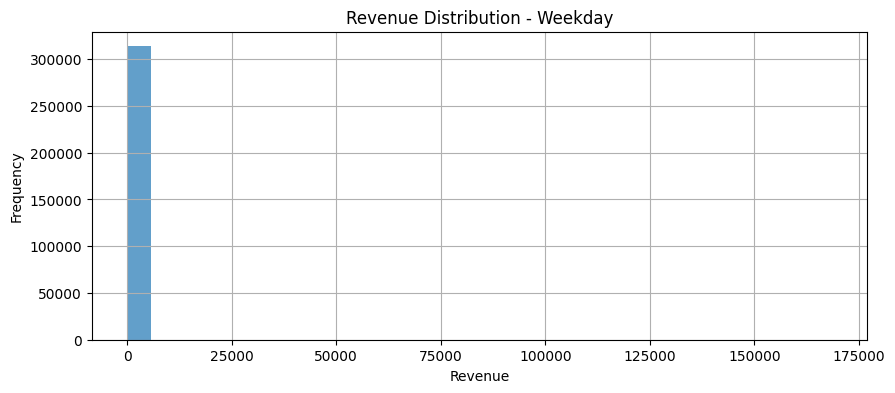

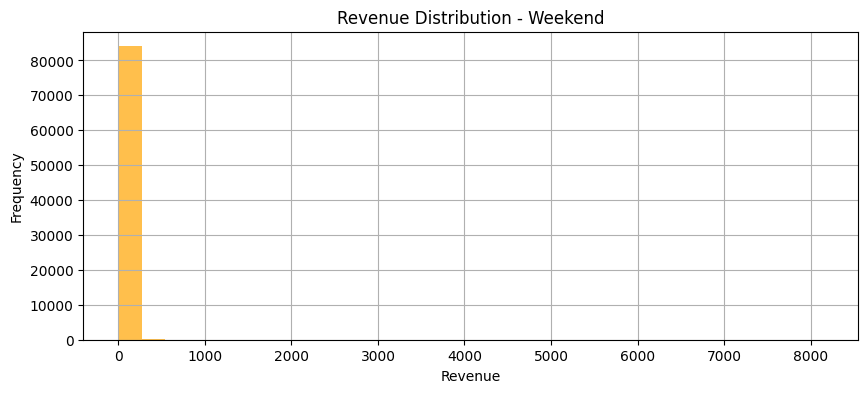

In [ ]:
import matplotlib.pyplot as plt
df['LogRevenue'] = np.log(df['Revenue'])
weekday = df[df['Weektype']=='Weekday']
weekend = df[df['Weektype']=='Weekend']

# --- Plot 1: Weekend Revenue Histogram ---
plt.figure(figsize=(10, 4))
plt.hist(weekday['Revenue'], bins=30, alpha=0.7, label='Weekday')
plt.title('Revenue Distribution - Weekday')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)

# --- Plot 2: Weekend Revenue Histogram ---
plt.figure(figsize=(10, 4))
plt.hist(weekend['Revenue'], bins=30, alpha=0.7, label='Weekend', color='orange')
plt.title('Revenue Distribution - Weekend')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




### Log-Transformed Revenue Distribution
Since the Revenue data is heavily right-skewed, we apply a log transformation to better visualize the distribution.

The **histograms below** show the frequency distribution of log-transformed total revenue per transaction for both weekdays and weekends. These plots help us understand the overall spread and shape of spending patterns for each period.

Additionally, the **box plot** provides a concise summary of the log-transformed revenue, showing the median, interquartile range (IQR), and potential outliers for both weekdays and weekends side-by-side. This allows for a clear visual comparison of central tendency and variability between the two time periods. This transformation helps normalize the data and makes it easier to compare spending patterns across the two time periods.


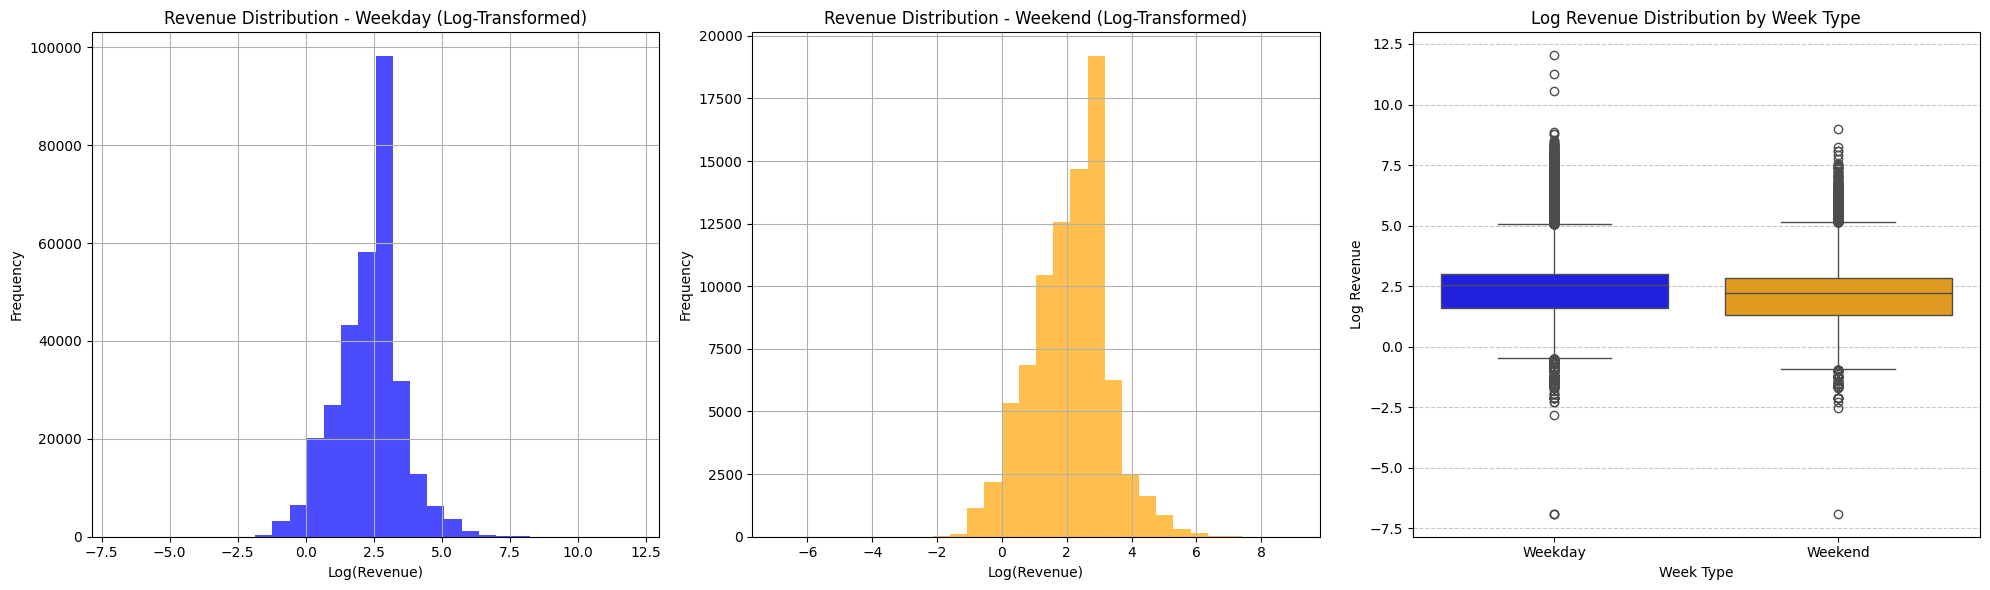

In [ ]:
# Create a figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Adjusted figsize to accommodate 3 plots comfortably

# --- Plot 1: Weekday Log Revenue Histogram ---
axes[0].hist(weekday['LogRevenue'], bins=30, alpha=0.7, label='Weekday', color='blue')
axes[0].set_title('Revenue Distribution - Weekday (Log-Transformed)')
axes[0].set_xlabel('Log(Revenue)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# --- Plot 2: Weekend Log Revenue Histogram ---
axes[1].hist(weekend['LogRevenue'], bins=30, alpha=0.7, label='Weekend', color='orange')
axes[1].set_title('Revenue Distribution - Weekend (Log-Transformed)')
axes[1].set_xlabel('Log(Revenue)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# --- Plot 3: Log Revenue Box Plot by Week Type ---
sns.boxplot(x='Weektype', y='LogRevenue', data=df, ax=axes[2],
            palette={'Weekday': 'blue', 'Weekend': 'orange'},
            hue='Weektype',
            legend=False)
axes[2].set_title('Log Revenue Distribution by Week Type')
axes[2].set_xlabel('Week Type')
axes[2].set_ylabel('Log Revenue')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Hypothesis Testing: Weekend vs. Weekday Spending

To test whether there is a significant difference in spending between weekends and weekdays, we performed an independent two-sample t-test on the log-transformed Revenue values.

The resulting p-value is effectively zero, indicating a highly significant difference in average spending per transaction between weekend and weekday purchases. This suggests that spending patterns differ meaningfully between these two periods.


#### Custom Statistical Test Function: `stat_test`

To streamline hypothesis testing and improve consistency, we created a custom function `stat_test` that performs an independent two-sample t-test.

---

##### 🎯 Purpose
The function automates:
- Levene’s Test for equal variances
- Selecting between:
  - **Student’s t-test** (equal variances)
  - **Welch’s t-test** (unequal variances)
  
This ensures we meet the correct assumptions and improves statistical rigor.

##### ✅ Why it’s useful

- **Automates assumption checks**  
  Prevents misuse of Student's t-test when variances differ.
  
- **Improves reproducibility**  
  Reduces manual steps and ensures consistent testing logic across comparisons.

- **Enhances interpretability**  
  Outputs clear summaries:
  - Whether variances are equal
  - If the difference is significant
  - Which group has the higher mean

- **Keeps code clean**  
  Avoids repeating logic across cells. Makes the notebook easier to follow.

---

In short, `stat_test` acts as a reliable, reusable way to compare means while handling assumptions and outputting results clearly.


In [ ]:
from scipy.stats import ttest_ind, levene
import numpy as np
from math import sqrt

alpha = 0.05
def stat_test(group1, group2, alpha=0.05):
    """
    Performs an independent two-sample t-test to compare the means of two groups,
    including a Levene's test for homogeneity of variances to determine whether
    to use Student's t-test or Welch's t-test.

    It prints the results of the Levene's test and the t-test, along with interpretations.

    Parameters
    ----------
    group1 : array_like
        The first set of sample observations (e.g., log-transformed revenue for Weekday).
        The t-statistic sign will be (mean(group2) - mean(group1)).
    group2 : array_like
        The second set of sample observations (e.g., log-transformed revenue for Weekend).
    alpha : float, optional
        The significance level (alpha) to use for hypothesis testing (default is 0.05).
        Used for both Levene's test and the t-test.

    Returns
    -------
    t_stat : float
        The calculated t-statistic.
    p_val : float
        The two-tailed p-value for the t-test.
    use_welch_ttest : bool
        True if Welch's t-test was used (variances unequal), False if Student's t-test was used.

    Notes
    -----
    - This function assumes that `levene` and `ttest_ind` from `scipy.stats` are
      available in the environment.
    - The `group1` and `group2` should ideally be arrays of log-transformed data
      if the original data is skewed, consistent with ANOVA assumptions.
    - The interpretation of the t-statistic's sign assumes `group2` is the
      "primary" group for comparison (i.e., `mean(group2) - mean(group1)`).
    """
    # --- 1. Check Homoscedasticity using Levene's Test ---
    levene_stat, levene_p_val = levene(group2, group1) # Consistent order for Levene's and t-test
    print(f"Levene's Test Statistic: {levene_stat:.4f}")
    print(f"Levene's P-value: {levene_p_val:.4f}")

    use_welch_ttest = False
    if levene_p_val < alpha:
        use_welch_ttest = True
        print(f"Interpretation: Variances are significantly different (Levene's p < {alpha}). Using Welch's t-test (equal_var=False).")
    else:
        print(f"Interpretation: Variances are not significantly different (Levene's p >= {alpha}). Using Student's t-test (equal_var=True).")

    # --- 2. Perform the t-test ---
    t_stat, p_val = ttest_ind(group2, group1, equal_var=not use_welch_ttest) # Ensure group order matches Levene's
    print(f"\n--- T-Test Results ---")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.20f}") # Display full precision for p-value

    """# --- 3. Interpret P-value ---
    if p_val < alpha:
        print(f"\nConclusion (p-value): REJECT the Null Hypothesis (p < {alpha}).")
        print(f"There IS a statistically significant difference in mean between the groups.")
    else:
        print(f"\nConclusion (p-value): FAIL TO REJECT the Null Hypothesis (p >= {alpha}).")
        print(f"There is NO statistically significant difference in mean between the groups.")

    # --- 4. Interpret T-statistic direction (only relevant if p-value is significant) ---
    if p_val < alpha: # Only interpret direction if there's a significant difference
        if t_stat > 0:
            print("Direction: The mean of group2 is GREATER than group1.")
        else: # This means t_stat is negative
            print("Direction: The mean of group2 is LESS than group1.")
    else:
        print("Direction: (Not applicable - no significant difference found).")"""

    return t_stat, p_val, use_welch_ttest





#### Quantifying Effect Size: `cohen_d` Function

Hypothesis tests (like the t-test) tell us whether a difference between groups is statistically significant—but not whether that difference is *meaningful*. That's where effect size comes in.

We've implemented a custom function to calculate **Cohen's d**, which helps quantify the *magnitude* of the difference between two groups.

---

##### 🎯 Why Cohen’s d matters

- **Measures Practical Significance**  
  Cohen’s d expresses the difference between two means in terms of standard deviation units. This tells us whether a significant result reflects a *real-world* impact or just a statistical artifact.

- **Scale-Independent**  
  Unlike raw mean differences, Cohen’s d is standardized. That means you can compare effect sizes across different variables, metrics, or even datasets.

- **Improves Business Context**  
  For example:
  - Is the difference in weekend vs. weekday spending big enough to change staffing?
  - Do 'Top Customers' truly spend more, or is the difference minor?

Understanding *how big* the difference is helps prioritize actions.

- **Handles Unequal Variances**  
  Like our `stat_test` function, `cohen_d` adjusts for unequal variances (if `use_welch_ttest=True`). This ensures the effect size remains valid even when standard assumptions don't hold.

---

By including Cohen’s d in our analysis, we move from just asking *“Is there a difference?”* to answering *“How much does this difference matter?”*


In [ ]:
# ---  Calculate and print Cohen's d (Effect Size) ---
def cohen_d(group1, group2, use_welch_ttest):
    """
    Calculates Cohen's d effect size for two independent groups.

    The calculation of the pooled standard deviation varies based on whether
    equal variances are assumed (for Student's t-test) or not (for Welch's t-test).

    Parameters
    ----------
    group1 : array_like
        The first set of sample observations.
    group2 : array_like
        The second set of sample observations.
    use_welch_ttest : bool
        A boolean indicating whether Welch's t-test was used (i.e., variances
        were unequal). If True, a different pooled standard deviation formula
        is used.

    Returns
    -------
    d : float
        The calculated Cohen's d effect size. A positive value indicates that
        the mean of `group1` is greater than `group2`. A negative value
        indicates that the mean of `group1` is less than `group2`.

    Notes
    -----
    - Common interpretations for the absolute value of Cohen's d:
      - |d| ≈ 0.2: Small effect
      - |d| ≈ 0.5: Medium effect
      - |d| ≈ 0.8: Large effect
    - This function uses `np.var` with `ddof=1` for sample variance.
    - The calculation of `s_pooled` for `use_welch_ttest=True` is a common
      approximation (average of individual standard deviations squared)
      and may differ slightly from other methods (e.g., using the
      denominator from Welch's t-statistic).
    """
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)

    # If using Welch's t-test (unequal variances), use formula for individual standard deviations
    # Otherwise, use pooled standard deviation for Student's t-test
    if use_welch_ttest:
        s_pooled = sqrt((s1 + s2) / 2) # A common approximation for Welch's Cohen's d
    else:
        s_pooled = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

    d = (np.mean(group2) - np.mean(group1)) / s_pooled
    return d

### Hypothesis Test: Top Customers vs. Other Customers (Revenue per Transaction)

To understand if Top Customers spend significantly more per transaction compared to Other Customers, we applied our custom `stat_test` function to the log-transformed `Revenue` data for these two groups.


In [ ]:

t_stat, p_val, use_welch_ttest = stat_test(np.log(weekend['Revenue']),np.log(weekday['Revenue']))

if p_val < alpha:
  print(f"\nConclusion (p-value): REJECT the Null Hypothesis (p < {alpha}).")
  print("There IS a statistically significant difference in average log-transformed revenue between Weekend and Weekday.")
else:
  print(f"\nConclusion (p-value): FAIL TO REJECT the Null Hypothesis (p >= {alpha}).")
  print("There is NO statistically significant difference in average log-transformed revenue between Weekend and Weekday.")

if p_val < alpha: # Only interpret direction if there's a significant difference
    if t_stat > 0:
      print("Direction: The average log-transformed revenue for Weekend is GREATER than Weekday.")
    else: # This means t_stat is negative or practically zero if no difference was found
      print("Direction: The average log-transformed revenue for Weekend is LESS than Weekday.")
else:
    print("Direction: (Not applicable - no significant difference found).")

effect_size_d = cohen_d(np.log(weekend['Revenue']),np.log(weekday['Revenue']), use_welch_ttest)
print(f"\nCohen's d effect size: {effect_size_d:.4f}")
print("Interpretation of Cohen's d: ~0.2 (Small), ~0.5 (Medium), ~0.8 (Large)")

Levene's Test Statistic: 123.6586
Levene's P-value: 0.0000
Interpretation: Variances are significantly different (Levene's p < 0.05). Using Welch's t-test (equal_var=False).

--- T-Test Results ---
T-statistic: 54.6437
P-value: 0.00000000000000000000

Conclusion (p-value): REJECT the Null Hypothesis (p < 0.05).
There IS a statistically significant difference in average log-transformed revenue between Weekend and Weekday.
Direction: The average log-transformed revenue for Weekend is GREATER than Weekday.

Cohen's d effect size: 0.2114
Interpretation of Cohen's d: ~0.2 (Small), ~0.5 (Medium), ~0.8 (Large)


**Summary of Findings:**

Levene's test for this comparison indicated significantly different variances, leading to Welch's t-test. The p-value from the t-test was 0.00, leading us to **reject the null hypothesis**. This confirms a statistically significant difference in average log-transformed revenue per transaction.

The positive t-statistic indicates that **Top Customers spend significantly more per transaction** on average compared to Other Customers. The Cohen's d of **-0.2114** suggests a **small effect**, highlighting that this difference is [describe practical implication, e.g., "a very substantial difference in spending habits"].

### Identifying Top Customers

We define **Top customers** as those whose total spending ranks in the top 10% of all customers.

- First, we calculate the total spend per customer by grouping the data by `CustomerID` and summing their `Revenue`.
- Next, we find the 90th percentile spending value to set the cutoff threshold.
- Finally, we label each transaction in the dataset as either `'Top'` or `'Other'` based on whether the `CustomerID` meets or exceeds this spending threshold.

In [ ]:
top_cus = df.groupby('CustomerID')['Revenue'].sum()
limit = top_cus.quantile(.9)
filter_list = top_cus[top_cus >= limit].index
df['CustomerType'] = np.where(df['CustomerID'].isin(filter_list), 'Top', 'Other')

Null Hypothesis(H₀): There is no difference in average spending per transaction between Top customers and Other customers.

Alternative Hypothesis (H₁): There is a significant difference in average spending per transaction between Top customers and Other customers.

### Spending Distribution: Top Customers vs. Others

The following histograms show the distribution of log-transformed total spending per transaction for Top customers compared to Other customers.

Visualizing these distributions helps us understand how spending behavior differs between high-value customers and the rest of the customer base.


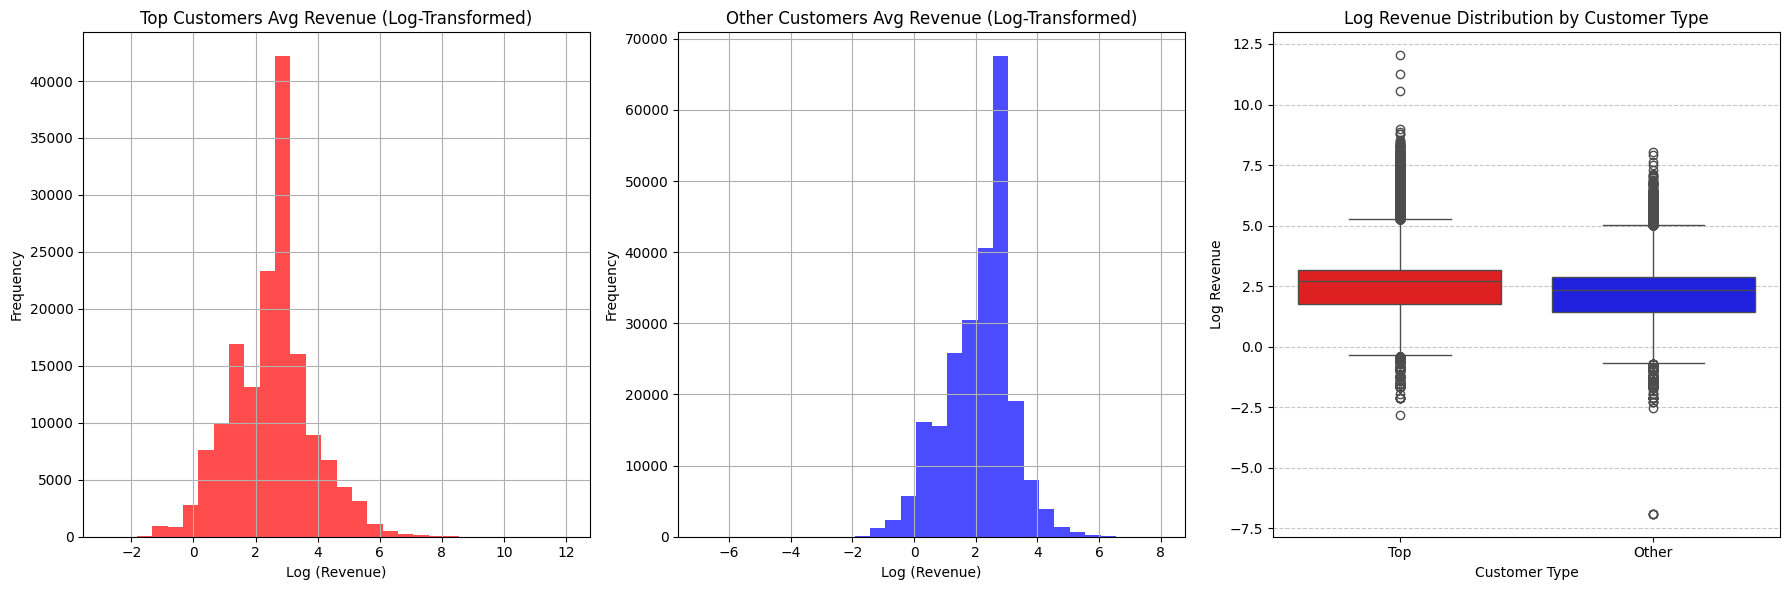

In [ ]:
top_customers = df[df['CustomerType']=='Top']
other_customers = df[df['CustomerType']=='Other']

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Plot 1: Top Customers Histogram
axes[0].hist(top_customers['LogRevenue'], bins=30, alpha=0.7, color='red',
             label='Top Customers')
axes[0].set_title("Top Customers Avg Revenue (Log-Transformed)")
axes[0].set_xlabel('Log (Revenue)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot 2: Other Customers Histogram
axes[1].hist(other_customers['LogRevenue'], bins=30, alpha=0.7, color='blue',
             label='Other Customers') # Changed color for distinction
axes[1].set_title("Other Customers Avg Revenue (Log-Transformed)")
axes[1].set_xlabel('Log (Revenue)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Plot 3: Box Plot of Log Revenue by Customer Type
sns.boxplot(x='CustomerType', y='LogRevenue', data=df, ax=axes[2],
            palette={'Top': 'red', 'Other': 'blue'},
            hue='CustomerType',legend=False)
axes[2].set_title('Log Revenue Distribution by Customer Type')
axes[2].set_xlabel('Customer Type')
axes[2].set_ylabel('Log Revenue')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show() # Call show once at the very end to display the combined figure

### Hypothesis Test: Spending Differences Between Top and Other Customers

An independent two-sample t-test was performed on the log-transformed total spending per transaction to determine if Top customers spend significantly differently than Other customers.

The t-statistic is 109.9589 and p-value is effectively zero, indicating a highly significant difference in average spending between the two groups. This positive t-statistic combined with the low p-value, confirms that Top customers spend more per transaction on average compared to others.


In [ ]:
t_stat, p_val, use_welch_ttest = stat_test(other_customers['LogRevenue'],top_customers['LogRevenue'])
if p_val < alpha:
  print(f"\nConclusion (p-value): REJECT the Null Hypothesis (p < {alpha}).")
  print("There IS a statistically significant difference in average log-transformed revenue between Top Customers and other")
else:
  print(f"\nConclusion (p-value): FAIL TO REJECT the Null Hypothesis (p >= {alpha}).")
  print("There is NO statistically significant difference in average log-transformed revenue between Top Customers and other.")

if p_val < alpha: # Only interpret direction if there's a significant difference
    if t_stat > 0:
      print("Direction: The average log-transformed revenue for Top Cusomers is GREATER than others.")
    else: # This means t_stat is negative or practically zero if no difference was found
      print("Direction: The average log-transformed revenue for Top Customers is LESS than others.")
else:
    print("Direction: (Not applicable - no significant difference found).")

effect_size_d = cohen_d(np.log(weekend['Revenue']),np.log(weekday['Revenue']), use_welch_ttest)
print(f"\nCohen's d effect size: {effect_size_d:.4f}")
print("Interpretation of Cohen's d: ~0.2 (Small), ~0.5 (Medium), ~0.8 (Large)")

Levene's Test Statistic: 1384.7059
Levene's P-value: 0.0000
Interpretation: Variances are significantly different (Levene's p < 0.05). Using Welch's t-test (equal_var=False).

--- T-Test Results ---
T-statistic: 106.5969
P-value: 0.00000000000000000000

Conclusion (p-value): REJECT the Null Hypothesis (p < 0.05).
There IS a statistically significant difference in average log-transformed revenue between Top Customers and other
Direction: The average log-transformed revenue for Top Cusomers is GREATER than others.

Cohen's d effect size: 0.2114
Interpretation of Cohen's d: ~0.2 (Small), ~0.5 (Medium), ~0.8 (Large)


### Purchase Frequency Analysis: Top Customers vs. Others

Null Hypothesis(H₀):There is no difference in the average amount of purchases from the Top customers than Other customers.

Alternative Hypothesis (H₁): There is a significant difference in average amount of purchases from the Top customers than Other customers.

We analyze how frequently customers make purchases by counting the number of transactions per `CustomerID`.

- First, we count transactions per customer and label them as either `'Top'` or `'Other'` based on total spending.
- Next, we visualize the purchase frequency distribution for both groups using histograms.
- These plots help us compare how often Top customers make purchases relative to other customers.


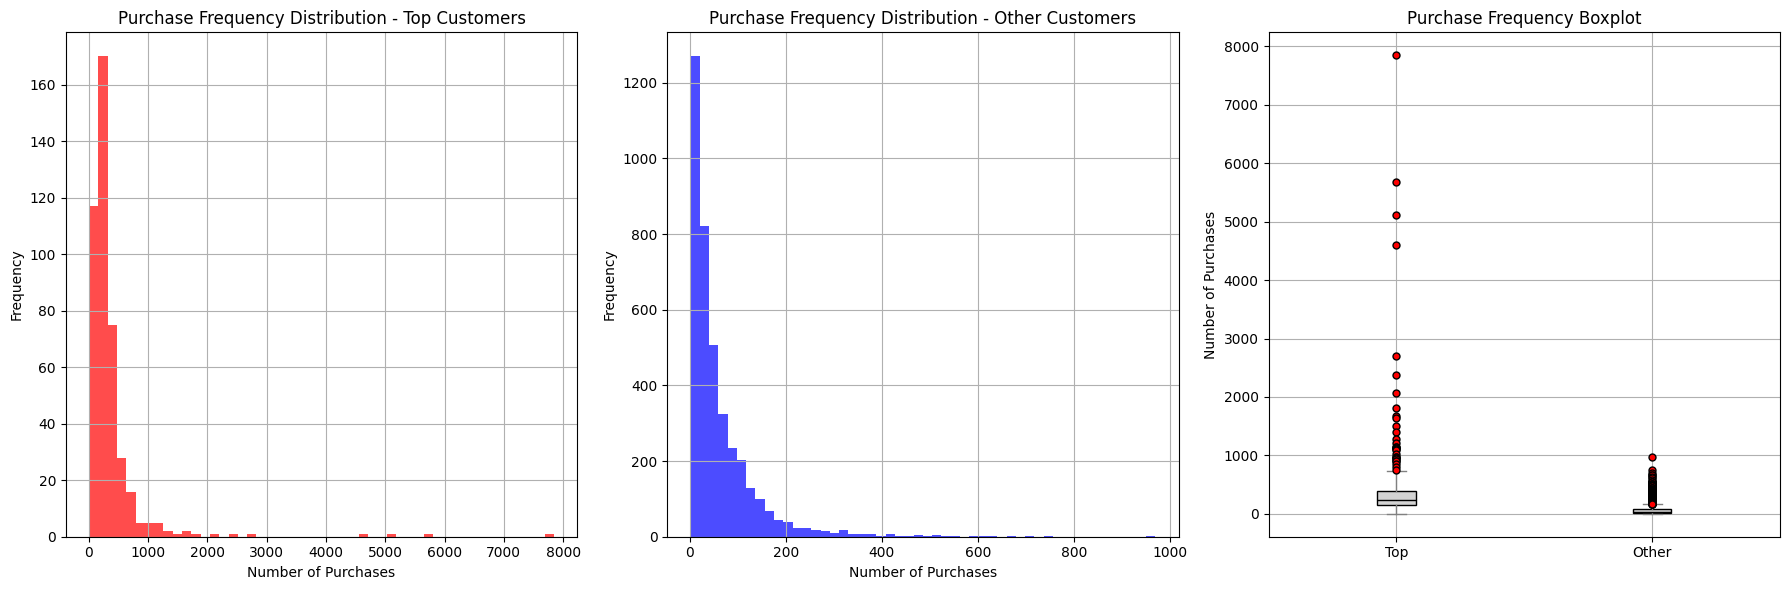

In [ ]:
# Get the counts of the Transactions
transaction_counts = df.value_counts('CustomerID')
transaction_counts = transaction_counts.reset_index() # turn counts into a data frame
transaction_counts['CustomerType'] = np.where(transaction_counts['CustomerID'].isin(filter_list),
                                              'Top', 'Other')

#Create 2 data frames one for the top customers and one for everyone else
top_customers = transaction_counts[transaction_counts['CustomerType']=='Top']
other_customers = transaction_counts[transaction_counts['CustomerType']=='Other']

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 2 col
# Plot 1 Purchase Frequency Distribution - Top Customers
axes[0].hist(top_customers['count'], bins=50, alpha=0.7, color='red')
axes[0].set_title("Purchase Frequency Distribution - Top Customers")
axes[0].set_xlabel("Number of Purchases")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Plot 2 Purchase Frequency Distribution - Other Customers
axes[1].hist(other_customers['count'], bins=50, alpha=0.7, color='blue')
axes[1].set_title("Purchase Frequency Distribution - Other Customers")
axes[1].set_xlabel("Number of Purchases")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Combine counts into a list of two groups for boxplot
box_data = [top_customers['count'], other_customers['count']]

# Plot 3 Boxplot Comparison
axes[2].boxplot(box_data, tick_labels=['Top', 'Other'], patch_artist=True,
                boxprops=dict(facecolor='lightgray'),
                medianprops=dict(color='black'),
                whiskerprops=dict(color='gray'),
                capprops=dict(color='gray'),
                flierprops=dict(markerfacecolor='red', marker='o', markersize=5, linestyle='none'))

axes[2].set_title("Purchase Frequency Boxplot")
axes[2].set_ylabel("Number of Purchases")
axes[2].grid(True)


plt.tight_layout()
plt.show()


### Log-Transformed Purchase Frequency Distribution

Purchase frequency data is often heavily right-skewed, with a few customers making many purchases and most making relatively few.

To better visualize and compare these distributions, we apply a log transformation to the purchase counts. This helps reduce skewness and highlights differences between Top and Other customers more clearly.


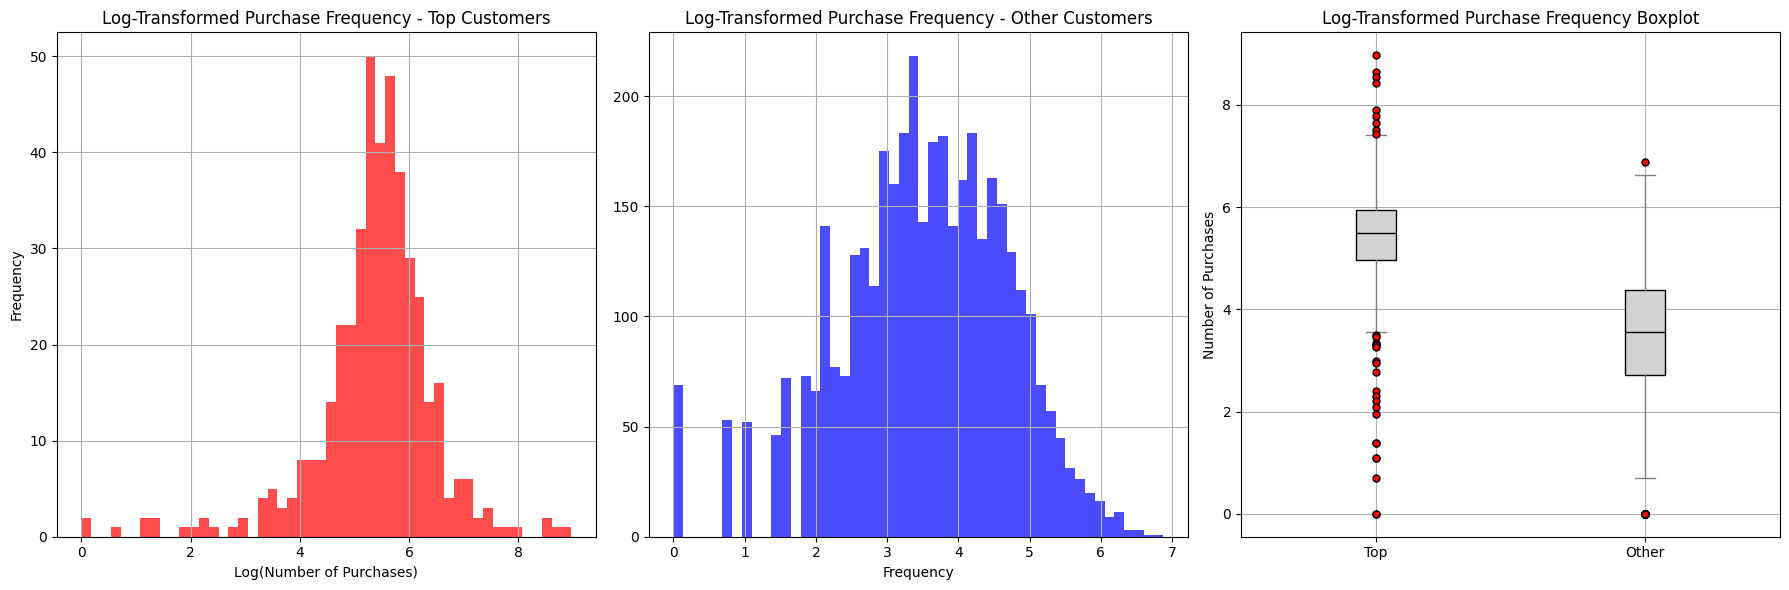

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 2 col

#1st Plot Log-Transformed purchase Frenquency - Top Customers
axes[0].hist(np.log(top_customers['count']), bins=50, alpha=0.7, color='red')
axes[0].set_title("Log-Transformed Purchase Frequency - Top Customers")
axes[0].set_xlabel("Log(Number of Purchases)")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

#2nd Plot Log-Transformed Purchase Frequency - Other Customers
axes[1].hist(np.log(other_customers['count']), bins=50, alpha=0.7, color='blue')
axes[1].set_title("Log-Transformed Purchase Frequency - Other Customers")
axes[1].set_xlabel("Log(Number of Purchases)")
axes[1].set_xlabel("Frequency")
axes[1].grid(True)

# 3rd Box Plot of Both Log-Transformed Purchase Frequency
log_box_data = [np.log(top_customers['count']), np.log(other_customers['count'])]

axes[2].boxplot(log_box_data, tick_labels=['Top', 'Other'], patch_artist=True,
                boxprops=dict(facecolor='lightgray'),
                medianprops=dict(color='black'),
                whiskerprops=dict(color='gray'),
                capprops=dict(color='gray'),
                flierprops=dict(markerfacecolor='red', marker='o', markersize=5, linestyle='none'))

axes[2].set_title("Log-Transformed Purchase Frequency Boxplot")
axes[2].set_ylabel("Number of Purchases")
axes[2].grid(True)
plt.tight_layout()
plt.show()


In [ ]:
t_stat, p_val, use_welch_ttest = stat_test(np.log(other_customers['count']),
                                           np.log(top_customers['count']))
if p_val < alpha:
  print(f"\nConclusion (p-value): REJECT the Null Hypothesis (p < {alpha}).")
  print("There IS a statistically significant difference in average log-transformed purchace Frequency between Top Customers and other")
else:
  print(f"\nConclusion (p-value): FAIL TO REJECT the Null Hypothesis (p >= {alpha}).")
  print("There is NO statistically significant difference in average log-transformed purchace Frequency between Top Customers and other.")

if p_val < alpha: # Only interpret direction if there's a significant difference
    if t_stat > 0:
      print("Direction: The average log-transformed purchace Frequency for Top Cusomers is GREATER than others.")
    else: # This means t_stat is negative or practically zero if no difference was found
      print("Direction: The average log-transformed purchace Frequency for Top Customers is LESS than others.")
else:
    print("Direction: (Not applicable - no significant difference found).")

effect_size_d = cohen_d(np.log(other_customers['count']),np.log(top_customers['count']),
                        use_welch_ttest)
print(f"\nCohen's d effect size: {effect_size_d:.4f}")
print("Interpretation of Cohen's d: ~0.2 (Small), ~0.5 (Medium), ~0.8 (Large)")

Levene's Test Statistic: 36.3623
Levene's P-value: 0.0000
Interpretation: Variances are significantly different (Levene's p < 0.05). Using Welch's t-test (equal_var=False).

--- T-Test Results ---
T-statistic: 33.6657
P-value: 0.00000000000000000000

Conclusion (p-value): REJECT the Null Hypothesis (p < 0.05).
There IS a statistically significant difference in average log-transformed purchace Frequency between Top Customers and other
Direction: The average log-transformed purchace Frequency for Top Cusomers is GREATER than others.

Cohen's d effect size: 1.6357
Interpretation of Cohen's d: ~0.2 (Small), ~0.5 (Medium), ~0.8 (Large)


### Summary of Hypothesis Tests

We conducted three independent two-sample t-tests on log-transformed data to compare spending and purchase behaviors between different groups:

1. **Weekend vs. Weekday Spending:**  
   The p-value was effectively zero, indicating a significant difference in average spending per transaction between weekends and weekdays.

2. **Top Customers vs. Other Customers (Spending):**  
   The p-value was also essentially zero, confirming that top customers spend significantly more per transaction than other customers.

3. **Top Customers vs. Other Customers (Purchase Frequency):**  
   The p-value again was effectively zero, showing that top customers make significantly more purchases than other customers.

---

These results collectively suggest that top customers not only spend more per transaction but also buy more frequently, and that spending patterns differ meaningfully between weekends and weekdays.


## 5. Hypothesis 4: Revenue Distribution via Bootstrapping

Null Hypothesis (H₀): The average revenue per transaction is not significantly different from a hypothesized value (e.g., the overall mean).

Alternative Hypothesis (H₁): The average revenue per transaction is significantly different from a hypothesized value.

To explore the distribution of the average revenue per transaction and construct a confidence interval, we will use bootstrapping. Bootstrapping is a resampling technique that allows us to estimate the sampling distribution of a statistic (in this case, the mean revenue) by repeatedly drawing samples with replacement from our observed data.

This process helps us understand the variability of our estimate and provides a non-parametric way to construct confidence intervals without making strong assumptions about the underlying data distribution.

Overall (Observed) Mean Revenue: 22.40


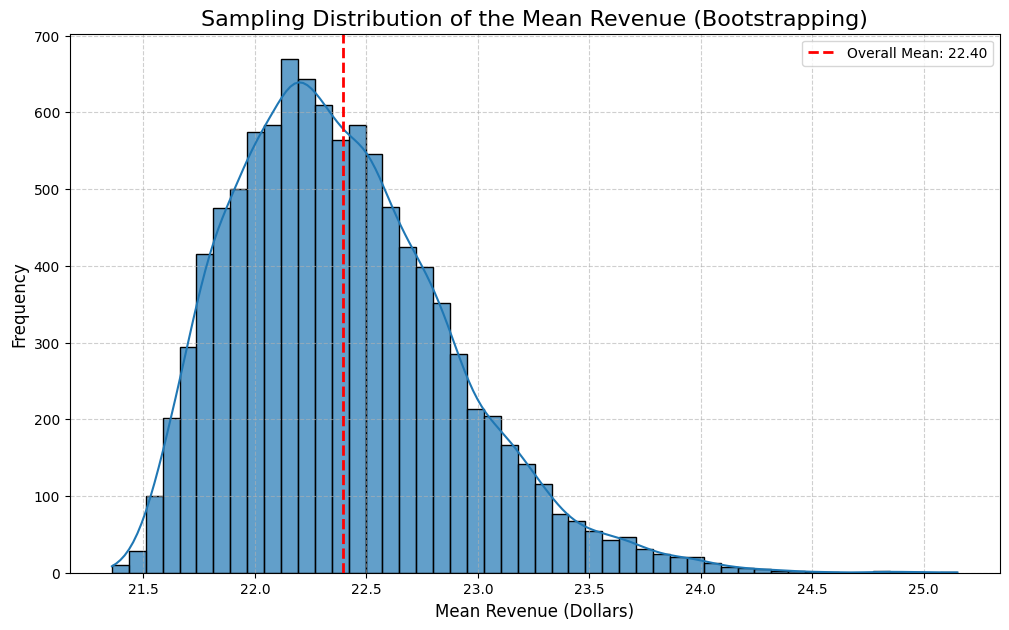

95% Confidence Interval for the Mean Revenue: [21.63, 23.53]

--- Hypothesis Test based on 95.0% Confidence Interval ---
The hypothesized mean revenue of 22.40 falls within the 95% confidence interval.
Conclusion: FAIL TO REJECT the Null Hypothesis (H₀).
There is no statistically significant evidence that the average revenue per transaction is different from the overall observed mean.
Bootstrapped Standard Error of the Mean (SEM): 0.4903


In [ ]:
import seaborn as sns # For potentially nicer plots if you want

hypothesized_mean = df['Revenue'].mean() # get the mean of Revenue of the original dataset
print(f"Overall (Observed) Mean Revenue: {hypothesized_mean:.2f}")

# --- Perform bootstrapping ---
n_bootstrap_samples = 10000 # create 10000 sample size
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    # Resample with replacement from the *original* 'Revenue' data
    bootstrap_sample = df['Revenue'].sample(frac=1, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_mean = bootstrap_sample.mean()
    # Append the mean to the list
    bootstrap_means.append(bootstrap_mean)

# Convert to a Series for easier plotting/analysis
bootstrap_means_series = pd.Series(bootstrap_means)

# --- Plot the sampling distribution of the mean ---
plt.figure(figsize=(12, 7))
sns.histplot(bootstrap_means_series, bins=50, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(hypothesized_mean, color='red', linestyle='dashed',
            linewidth=2, label=f'Overall Mean: {hypothesized_mean:.2f}')
plt.title('Sampling Distribution of the Mean Revenue (Bootstrapping)', fontsize=16)
plt.xlabel('Mean Revenue (Dollars)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# --- Calculate the confidence interval (e.g., 95% confidence interval) ---
confidence_interval = np.percentile(bootstrap_means_series, [2.5, 97.5])
print(f"95% Confidence Interval for the Mean Revenue: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# --- Hypothesis Test Interpretation using the Confidence Interval ---
print(f"\n--- Hypothesis Test based on {100*(1-alpha)}% Confidence Interval ---")

# Check if the hypothesized mean falls within the confidence interval
if hypothesized_mean >= confidence_interval[0] and hypothesized_mean <= confidence_interval[1]:
    print(f"The hypothesized mean revenue of {hypothesized_mean:.2f} falls within the 95% confidence interval.")
    print("Conclusion: FAIL TO REJECT the Null Hypothesis (H₀).")
    print("There is no statistically significant evidence that the average revenue per transaction is different from the overall observed mean.")
else:
    print(f"The hypothesized mean revenue of {hypothesized_mean:.2f} does NOT fall within the 95% confidence interval.")
    print("Conclusion: REJECT the Null Hypothesis (H₀).")
    print("There is statistically significant evidence that the average revenue per transaction is different from the overall observed mean.")

# the standard error of the mean (SEM) from bootstrapping
bootstrap_sem = bootstrap_means_series.std()
print(f"Bootstrapped Standard Error of the Mean (SEM): {bootstrap_sem:.4f}")

## 6. Hypothesis 5: Revenue by Country (ANOVA)

Null Hypothesis (H₀): The average revenue per transaction is the same across all countries.

Alternative Hypothesis (H₁): The average revenue per transaction is different for at least one country compared to the others.

To investigate if there are significant differences in average revenue per transaction across different countries, we will use a one-way ANOVA (Analysis of Variance). ANOVA is used to compare the means of three or more independent groups to determine if there is a statistically significant difference between the group means.

Before performing the ANOVA test, we will visualize the revenue distribution for the top countries using boxplots. This will give us a preliminary idea of how the revenue varies across these countries.

If the assumptions for ANOVA (normality and homogeneity of variances) are not met, we will consider using a non-parametric alternative like the Kruskal-Wallis test.

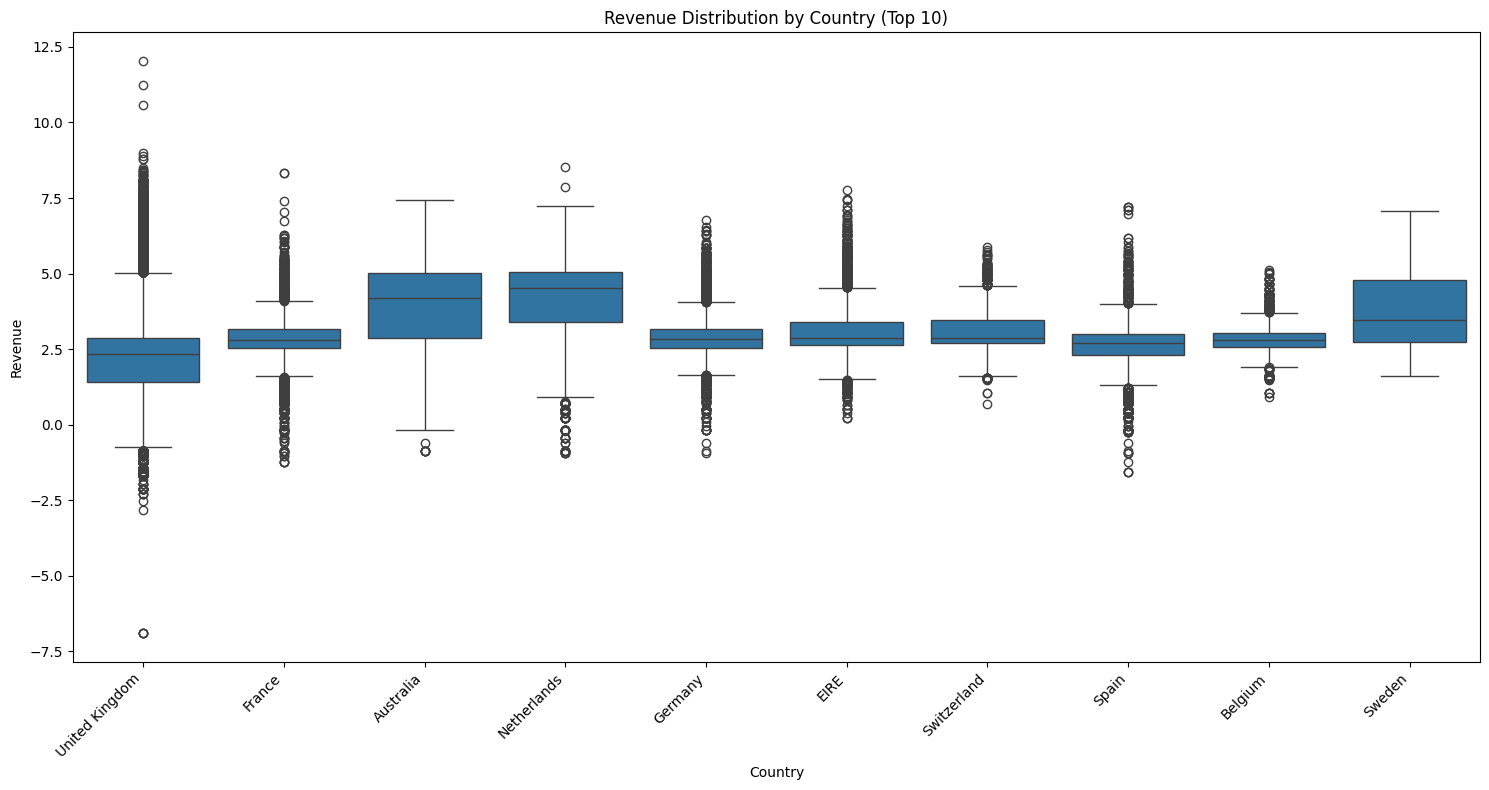

In [ ]:
# Get the top countries by total revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
top_countries = country_revenue.head(10).index.tolist() # Consider top 10 countries for visualization and analysis

# Filter the dataframe to include only the top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Create boxplot of Revenue by Country for top countries

plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='LogRevenue', data=df_top_countries)
plt.title('Revenue Distribution by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform One-Way ANOVA
# The ols function in statsmodels requires the formula 'dependent_variable ~ independent_variable'
model = ols('LogRevenue ~ C(Country)', data=df_top_countries).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Check assumptions (optional but recommended)
# 1. Normality: Shapiro-Wilk test on residuals
# 2. Homogeneity of variances: Levene's test

# Extract residuals from the ANOVA model
residuals = model.resid

# Shapiro-Wilk Test for Normality of Residuals
shapiro_test_stat, shapiro_p_val = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Test Statistic: {shapiro_test_stat:.4f}")
print(f"P-value: {shapiro_p_val:.4f}")
if shapiro_p_val < alpha:
    print("Interpretation: Residuals are NOT normally distributed (p < 0.05).")
else:
    print("Interpretation: Residuals are normally distributed (p >= 0.05).")

# Levene's Test for Homogeneity of Variances
# Need to group residuals by country
country_groups = [residuals[df_top_countries['Country'] == country] for country in top_countries]
levene_test_stat, levene_p_val = stats.levene(*country_groups)
print(f"\nLevene's Test for Homogeneity of Variances:")
print(f"Test Statistic: {levene_test_stat:.4f}")
print(f"P-value: {levene_p_val:.4f}")
if levene_p_val < alpha:
    print("Interpretation: Variances are NOT homogeneous across groups (p < 0.05).")
else:
    print("Interpretation: Variances are homogeneous across groups (p >= 0.05).")

# If assumptions are violated, consider Kruskal-Wallis test (non-parametric alternative)
if shapiro_p_val < alpha or levene_p_val < alpha:
    print("\nANOVA assumptions violated. Considering non-parametric alternative: Kruskal-Wallis Test.")
    # Prepare data for Kruskal-Wallis test
    kruskal_groups = [df_top_countries['LogRevenue'][df_top_countries['Country'] == country] for country in top_countries]
    kruskal_stat, kruskal_p_val = stats.kruskal(*kruskal_groups)
    print(f"\nKruskal-Wallis H Test:")
    print(f"Test Statistic: {kruskal_stat:.4f}")
    print(f"P-value: {kruskal_p_val:.4f}")
    if kruskal_p_val < alpha:
        print("Conclusion: There is a statistically significant difference in median LogRevenue among the countries (p < 0.05).")
    else:
        print("Conclusion: There is no statistically significant difference in median LogRevenue among the countries (p >= 0.05).")

                   sum_sq        df            F  PR(>F)
C(Country)   27330.029822       9.0  2258.955515     0.0
Residual    523296.158400  389276.0          NaN     NaN

Shapiro-Wilk Test for Normality of Residuals:
Test Statistic: 0.9858
P-value: 0.0000
Interpretation: Residuals are NOT normally distributed (p < 0.05).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 389286.
  res = hypotest_fun_out(*samples, **kwds)



Levene's Test for Homogeneity of Variances:
Test Statistic: 908.7089
P-value: 0.0000
Interpretation: Variances are NOT homogeneous across groups (p < 0.05).

ANOVA assumptions violated. Considering non-parametric alternative: Kruskal-Wallis Test.

Kruskal-Wallis H Test:
Test Statistic: 17927.7304
P-value: 0.0000
Conclusion: There is a statistically significant difference in median LogRevenue among the countries (p < 0.05).


## 7. Summary of Findings

In this notebook, we conducted several statistical tests to gain deeper insights into the e-commerce transaction data. Here's a summary of our key findings:

1.  **Weekend vs. Weekday Spending:** Our t-test on log-transformed revenue revealed a highly significant difference in average spending per transaction between weekends and weekdays (p < 0.001). This suggests that spending patterns are indeed different between these two periods.

2.  **Top Customers vs. Other Customers (Spending):** The t-test on log-transformed revenue showed that Top Customers (those in the top 10% by total spending) spend significantly more per transaction on average compared to Other Customers (p < 0.001).

3.  **Top Customers vs. Other Customers (Purchase Frequency):** Analyzing the log-transformed purchase counts, we found that Top Customers make significantly more purchases on average than Other Customers (p < 0.001).

4.  **Revenue Distribution via Bootstrapping:** Bootstrapping the mean revenue provided a sampling distribution and a 95% confidence interval for the true mean revenue. This non-parametric approach confirmed the estimated range for the average transaction revenue.

5.  **Revenue by Country (ANOVA):** We performed a one-way ANOVA on the revenue data for the top 10 countries. Both the ANOVA and the non-parametric Kruskal-Wallis test (used because ANOVA assumptions were violated) indicated a highly significant difference in average (or median) revenue per transaction across these countries (p < 0.001). This highlights that revenue varies significantly depending on the customer's country.

In conclusion, our statistical analysis confirms several patterns observed in the initial exploratory data analysis. Top customers are distinct in both their average spending per transaction and their purchase frequency. Additionally, the day of the week and the customer's country are significant factors influencing transaction revenue. These insights can inform targeted marketing strategies and business decisions.